<a href="https://colab.research.google.com/github/aryan2107-cloud/100-Day-ML-Challenge-/blob/main/Day06(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')

Loading the data

In [2]:
url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv"
df = pd.read_csv(url)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns")

Dataset loaded successfully!
Shape: 303 rows x 14 columns


In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# Understanding the columns
column_info = {
    'age': 'Age in years',
    'sex': 'Sex (1=male, 0=female)',
    'cp': 'Chest pain type (0-3)',
    'trestbps': 'Resting blood pressure (mm Hg)',
    'chol': 'Serum cholesterol (mg/dl)',
    'fbs': 'Fasting blood sugar > 120 mg/dl (1=true, 0=false)',
    'restecg': 'Resting ECG results (0-2)',
    'thalach': 'Maximum heart rate achieved',
    'exang': 'Exercise induced angina (1=yes, 0=no)',
    'oldpeak': 'ST depression induced by exercise',
    'slope': 'Slope of peak exercise ST segment (0-2)',
    'ca': 'Number of major vessels colored by fluoroscopy (0-3)',
    'thal': 'Thalassemia (1=normal, 2=fixed defect, 3=reversible defect)',
    'target': 'Heart disease (1=yes, 0=no)'
}

print("\nColumn Descriptions:")
print("="*70)
for col, desc in column_info.items():
    print(f"  {col:<12} {desc}")


Column Descriptions:
  age          Age in years
  sex          Sex (1=male, 0=female)
  cp           Chest pain type (0-3)
  trestbps     Resting blood pressure (mm Hg)
  chol         Serum cholesterol (mg/dl)
  fbs          Fasting blood sugar > 120 mg/dl (1=true, 0=false)
  restecg      Resting ECG results (0-2)
  thalach      Maximum heart rate achieved
  exang        Exercise induced angina (1=yes, 0=no)
  oldpeak      ST depression induced by exercise
  slope        Slope of peak exercise ST segment (0-2)
  ca           Number of major vessels colored by fluoroscopy (0-3)
  thal         Thalassemia (1=normal, 2=fixed defect, 3=reversible defect)
  target       Heart disease (1=yes, 0=no)


In [5]:
print("\n Numerical summary")
df.describe().round(2)


 Numerical summary


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


Missing values analysis

In [8]:
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count':missing,
    'Missing %':missing_pct
})

print("Missing Values:")
print(missing_df[missing_df['Missing Count'] > 0])

if missing.sum() == 0:
  print("\nNo missing values found!")
else:
  print("\nMissing values found!")

Missing Values:
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

No missing values found!


In [9]:
# Check for implicit missing (e.g., 0 or -1 used as placeholder)
print("Checking for suspicious values:")
print("="*50)

for col in df.columns:
    zeros = (df[col] == 0).sum()
    negatives = (df[col] < 0).sum()
    if zeros > 0 or negatives > 0:
        print(f"  {col}: {zeros} zeros, {negatives} negatives")

Checking for suspicious values:
  sex: 96 zeros, 0 negatives
  cp: 143 zeros, 0 negatives
  fbs: 258 zeros, 0 negatives
  restecg: 147 zeros, 0 negatives
  exang: 204 zeros, 0 negatives
  oldpeak: 99 zeros, 0 negatives
  slope: 21 zeros, 0 negatives
  ca: 175 zeros, 0 negatives
  thal: 2 zeros, 0 negatives
  target: 138 zeros, 0 negatives


Target Variable analysis

In [10]:
#Target Distribution
print("Target Variable: Heart disease")
print("="* 50)
print(df['target'].value_counts())
print(f"\nClass balance: {df['target'].mean():.1%} have heart disease")


Target Variable: Heart disease
target
1    165
0    138
Name: count, dtype: int64

Class balance: 54.5% have heart disease


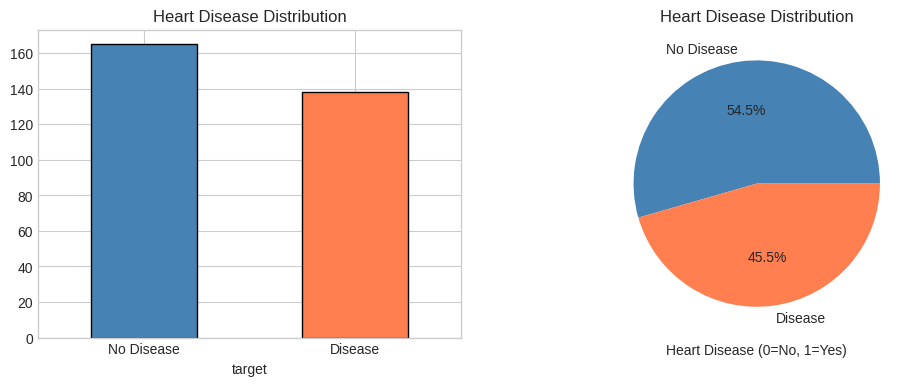

In [11]:
#Visualize Target
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df['target'].value_counts().plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'], edgecolor='black')
axes[0].set_title("Heart Disease Distribution")
axes[1].set_xlabel("Heart Disease (0=No, 1=Yes)")
axes[1].set_ylabel("Count")
axes[0].set_xticklabels(['No Disease', 'Disease'], rotation=0)

df['target'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                 colors=['steelblue', 'coral'],labels=['No Disease', 'Disease'])
axes[1].set_title("Heart Disease Distribution")
axes[1].set_ylabel('')
plt.show()

Univariate analysis

In [12]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

print(f"Numeric features: {numeric_cols}")
print(f"Categorical features: {categorical_cols}")

Numeric features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


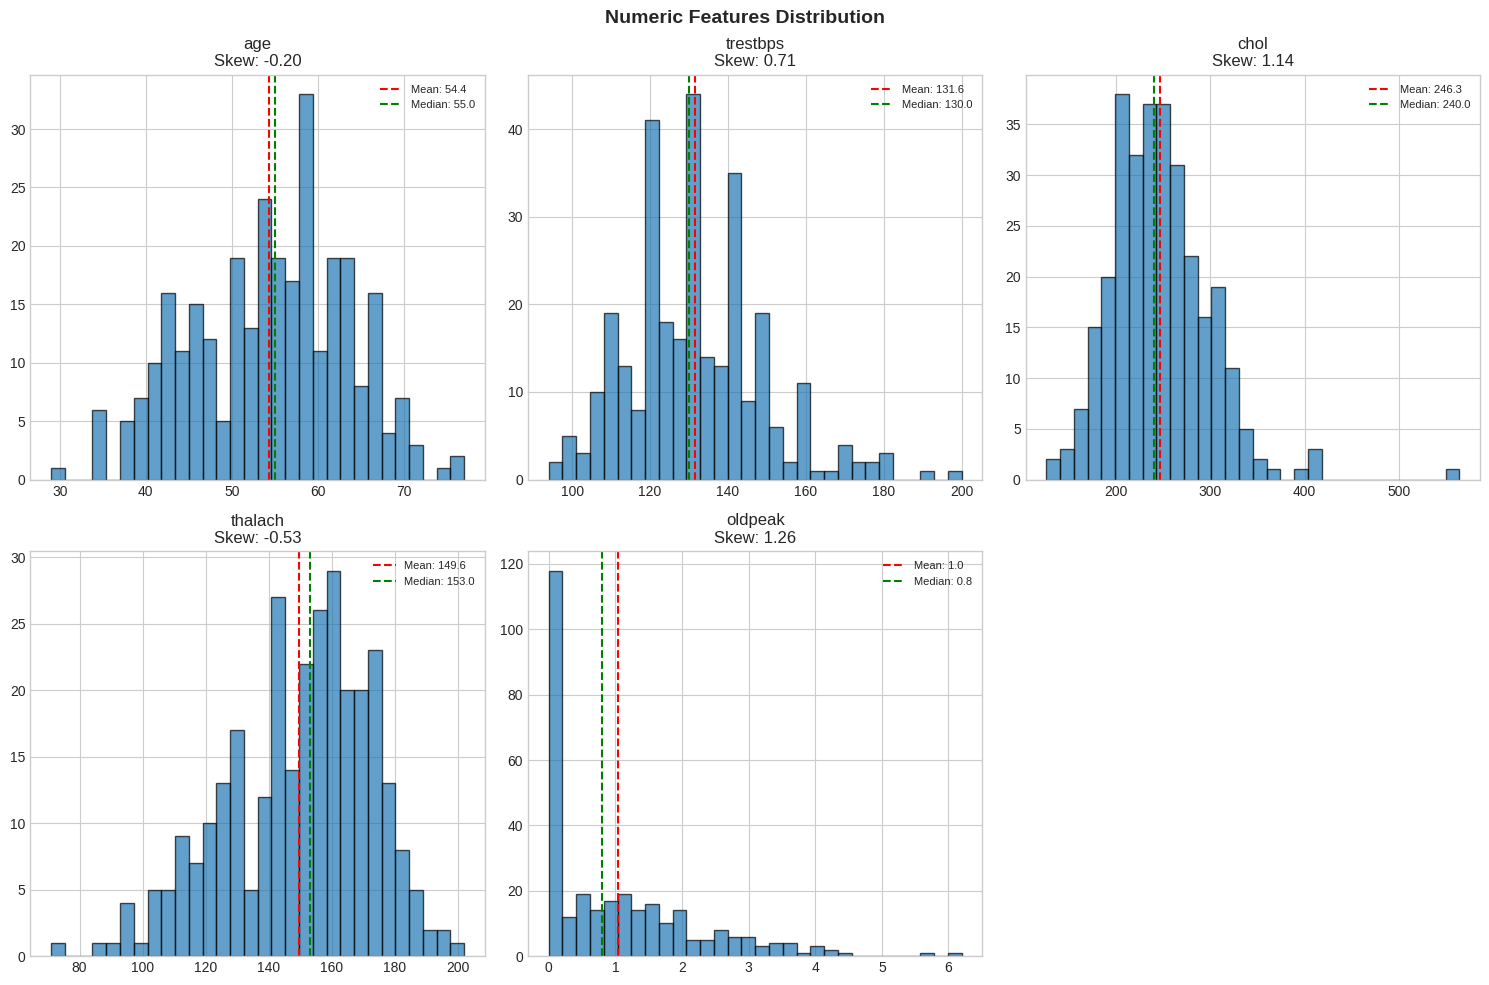

In [16]:
# Numeric features: Histograms with statistics
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]

    # Histogram
    ax.hist(df[col], bins=30, edgecolor='black', alpha=0.7)

    # Add mean and median lines
    ax.axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.1f}')
    ax.axvline(df[col].median(), color='green', linestyle='--', label=f'Median: {df[col].median():.1f}')

    # Stats in title
    skewness = stats.skew(df[col])
    ax.set_title(f'{col}\nSkew: {skewness:.2f}')
    ax.legend(fontsize=8)

# Hide unused subplot
axes[-1].set_visible(False)

plt.suptitle('Numeric Features Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

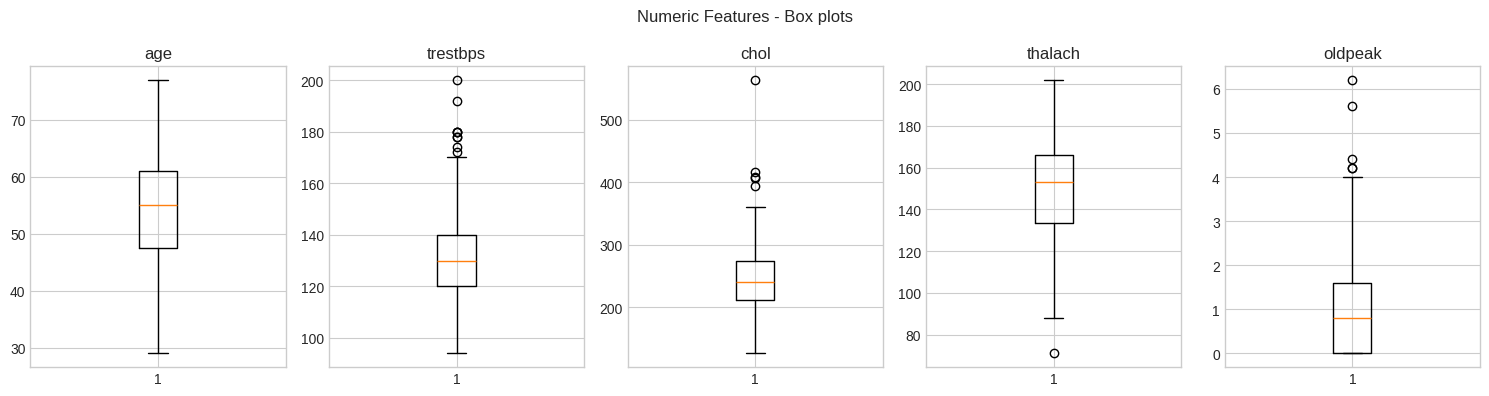

In [17]:
#Numeric features
fig, axes = plt.subplots(1,5, figsize=(15, 4))

for ax, col in zip(axes, numeric_cols):
  ax.boxplot(df[col])
  ax.set_title(col)

plt.suptitle("Numeric Features - Box plots")
plt.tight_layout()
plt.show()

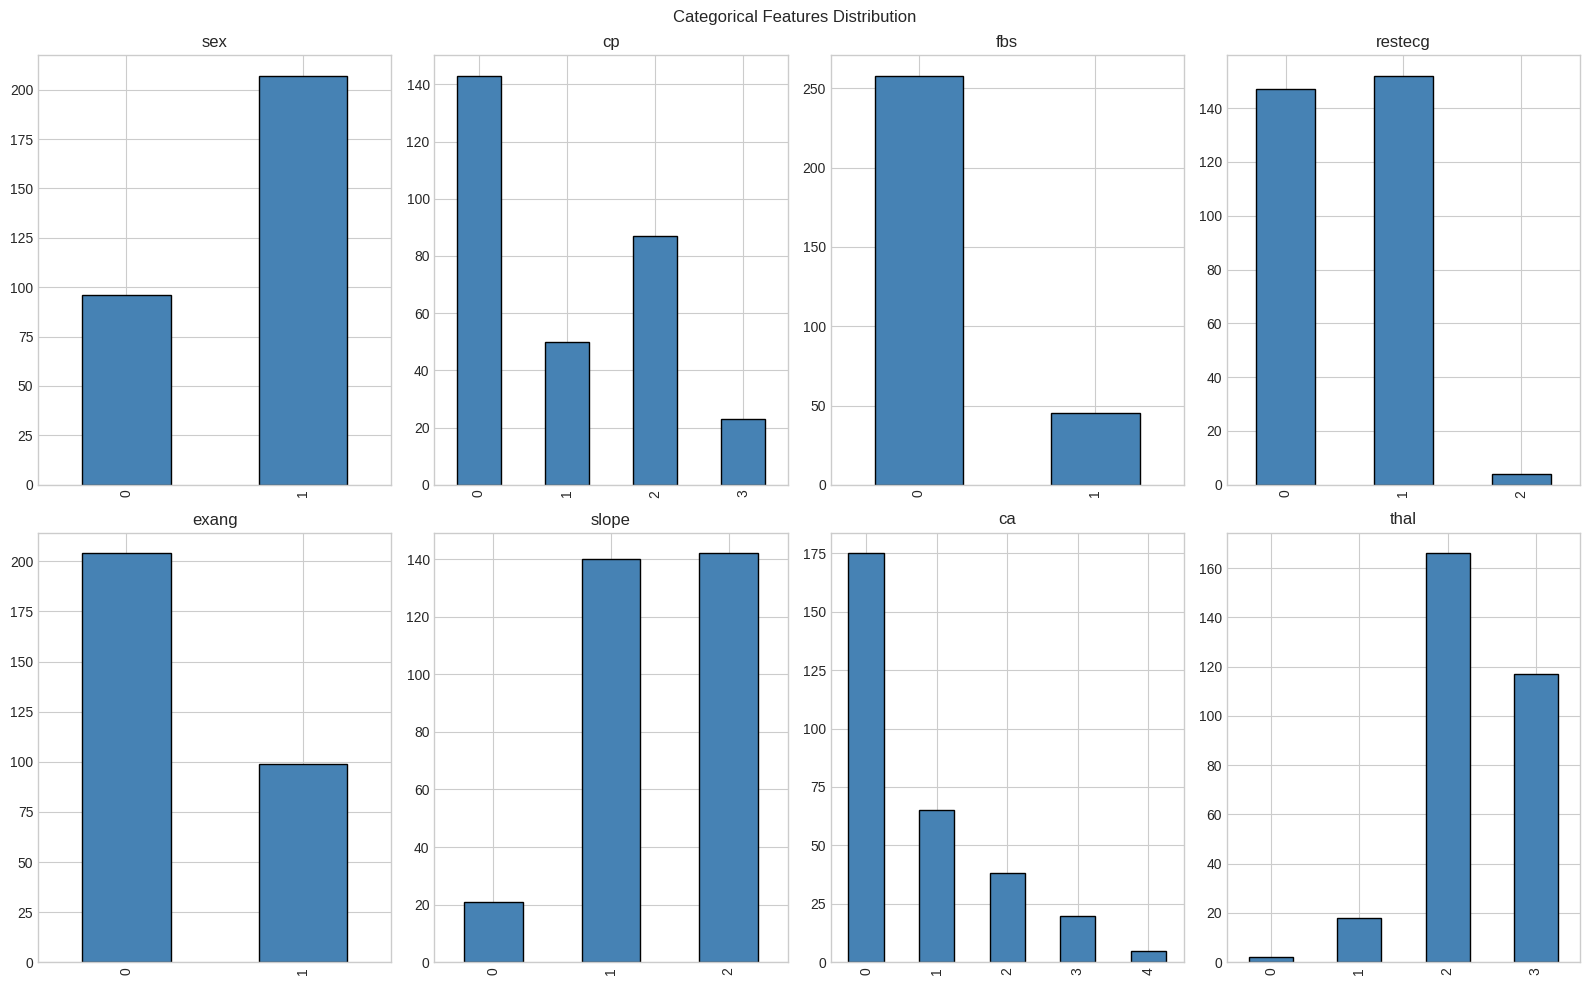

In [19]:
#categorical features: Bar plots
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
  ax = axes[i]
  df[col].value_counts().sort_index().plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
  ax.set_title(f"{col}")
  ax.set_xlabel('')

plt.suptitle("Categorical Features Distribution")
plt.tight_layout()
plt.show()

In [21]:
#summary
print("Categorical Features summary:")
print('='*50)

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().to_string())

Categorical Features summary:

sex:
sex
1    207
0     96

cp:
cp
0    143
2     87
1     50
3     23

fbs:
fbs
0    258
1     45

restecg:
restecg
1    152
0    147
2      4

exang:
exang
0    204
1     99

slope:
slope
2    142
1    140
0     21

ca:
ca
0    175
1     65
2     38
3     20
4      5

thal:
thal
2    166
3    117
1     18
0      2


Bivariate Analysis

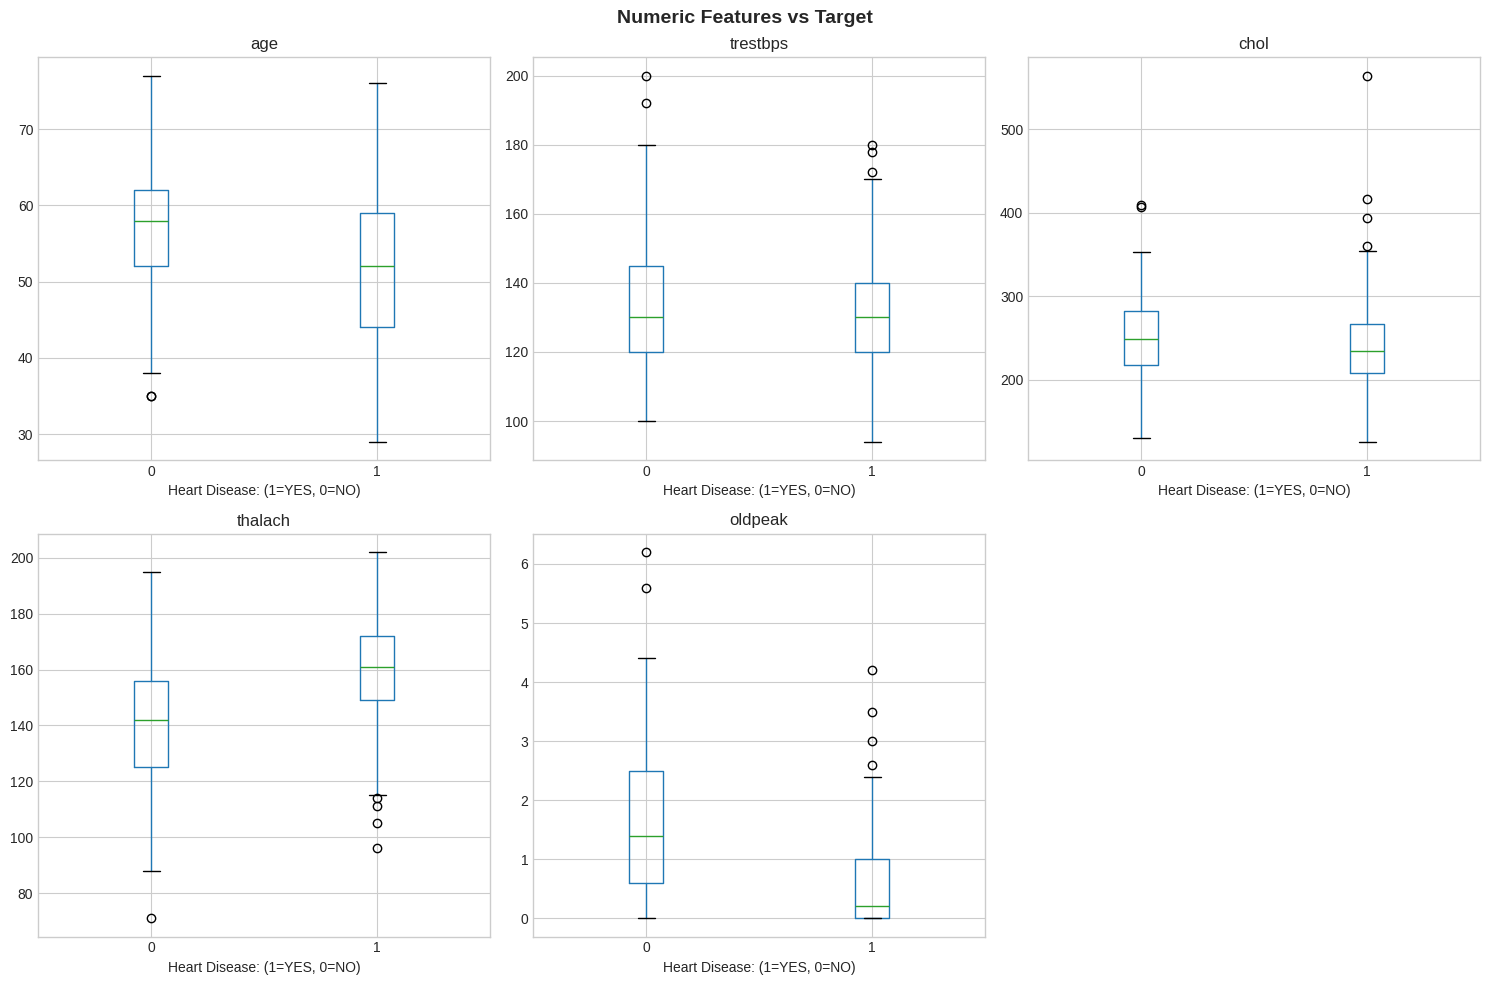

In [24]:
#Numeric features vs Target
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
  ax = axes[i]

  #boxplot by target
  df.boxplot(column=col, by='target', ax=ax)
  ax.set_title(col)
  ax.set_xlabel('Heart Disease: (1=YES, 0=NO)')

axes[-1].set_visible(False)
plt.suptitle("Numeric Features vs Target", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [26]:
#Statistical comparison
print("T_test results: Numeric features vs Heart Diseases")
print('='*60)

print(f"{'feature':<12} {'No Disease':<15} {'Disease':<15} {'p-value':<10} {'signinficant?'}")
print('-'*60)

for col in numeric_cols:
  no_disease = df[df['target'] == 0][col]
  yes_disease = df[df['target'] == 1][col]

  t_stat, p_value = stats.ttest_ind(no_disease, yes_disease)

  sig = '*' if p_value < 0.05 else 'No'
  print(f"{col:<12} {no_disease.mean():<15.1f} {yes_disease.mean():<15.1f} {p_value:<10.3f} {sig}")


T_test results: Numeric features vs Heart Diseases
feature      No Disease      Disease         p-value    signinficant?
------------------------------------------------------------
age          56.6            52.5            0.000      *
trestbps     134.4           129.3           0.012      *
chol         251.1           242.2           0.139      No
thalach      139.1           158.5           0.000      *
oldpeak      1.6             0.6             0.000      *


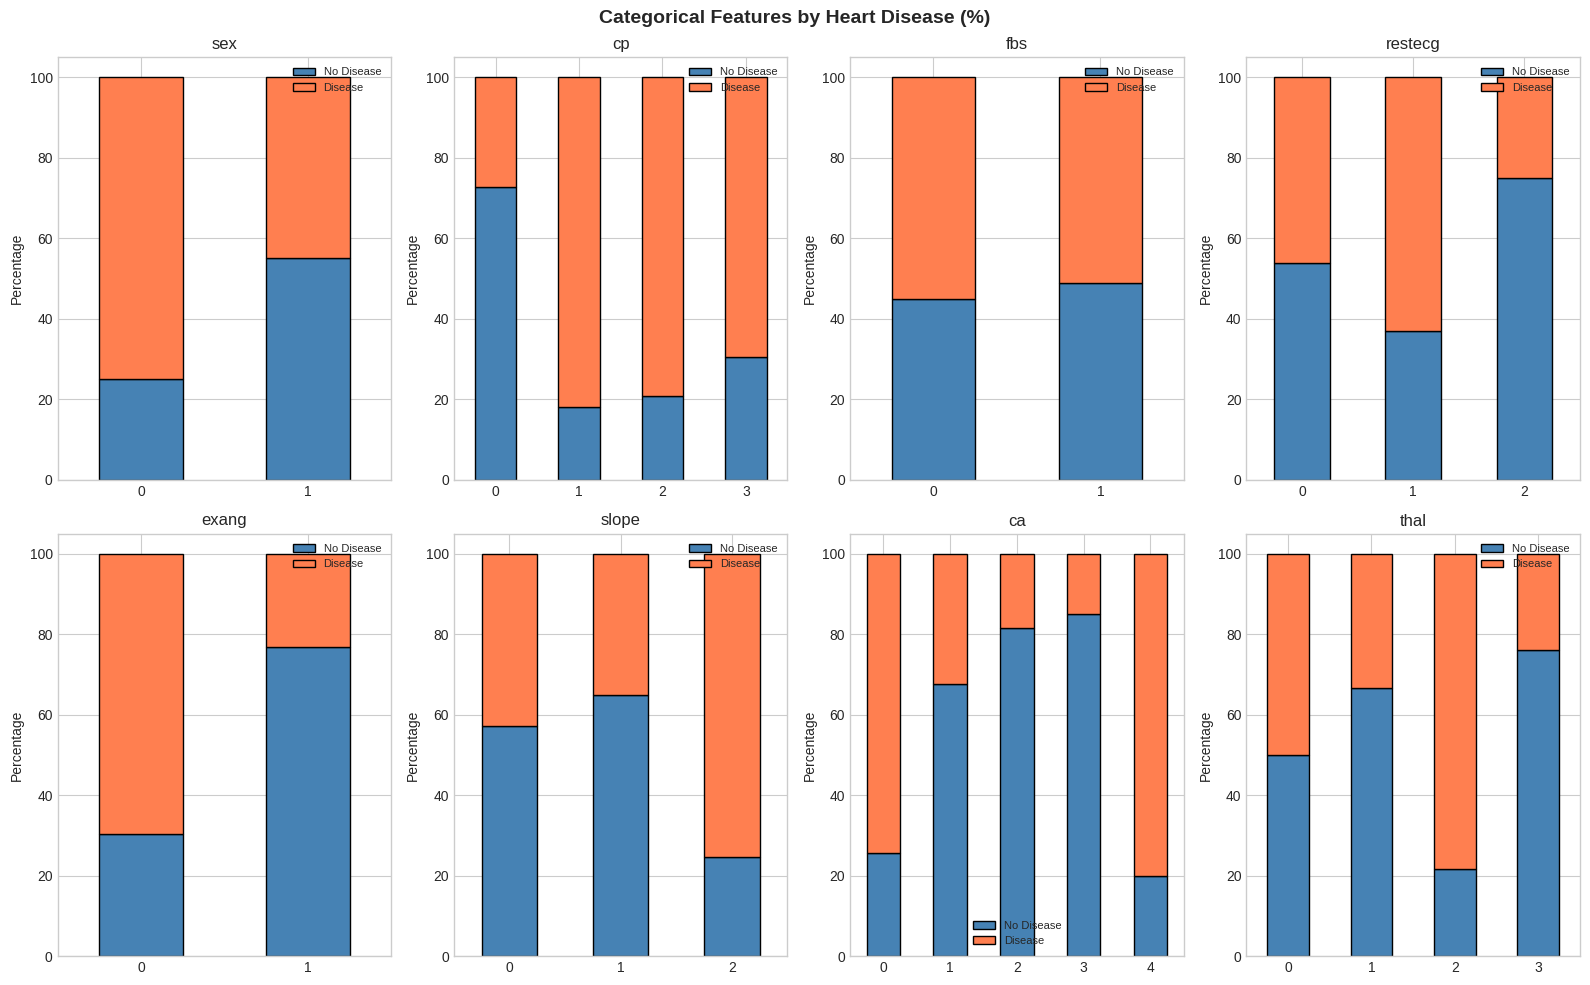

In [29]:
# Categorical features vs Target: Stacked bar plots
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]

    # Cross-tabulation
    ct = pd.crosstab(df[col], df['target'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, ax=ax, color=['steelblue', 'coral'], edgecolor='black')

    ax.set_title(f'{col}')
    ax.set_xlabel('')
    ax.set_ylabel('Percentage')
    ax.legend(['No Disease', 'Disease'], fontsize=8)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.suptitle('Categorical Features by Heart Disease (%)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [31]:
#Chi-squared test
print("Chi-Square Test: Categorical Features vs Heart Disease")
print("="*60)
print(f"{'Feature':<12} {'Chi-Square':<15} {'p-value':<15} {'Significant?'}")
print("-"*60)

for col in categorical_cols:
    ct = pd.crosstab(df[col], df['target'])
    chi2, p_value, dof, expected = stats.chi2_contingency(ct)

    sig = '✓ Yes' if p_value < 0.05 else 'No'
    print(f"{col:<12} {chi2:<15.2f} {p_value:<15.4f} {sig}")

Chi-Square Test: Categorical Features vs Heart Disease
Feature      Chi-Square      p-value         Significant?
------------------------------------------------------------
sex          22.72           0.0000          ✓ Yes
cp           81.69           0.0000          ✓ Yes
fbs          0.11            0.7444          No
restecg      10.02           0.0067          ✓ Yes
exang        55.94           0.0000          ✓ Yes
slope        47.51           0.0000          ✓ Yes
ca           74.37           0.0000          ✓ Yes
thal         85.30           0.0000          ✓ Yes


In [32]:
#Disease rate by key categorical features
print("Disease rate by key categorical features:")
print("="*60)

for col in ['sex', 'cp', 'exang', 'thal']:
  print(f"\n{col}:")
  rate = df.groupby(col)['target'].mean() * 100
  for idx, val in rate.items():
    print(f"  {idx}: {val:.1f}% have heart disease")

Disease rate by key categorical features:

sex:
  0: 75.0% have heart disease
  1: 44.9% have heart disease

cp:
  0: 27.3% have heart disease
  1: 82.0% have heart disease
  2: 79.3% have heart disease
  3: 69.6% have heart disease

exang:
  0: 69.6% have heart disease
  1: 23.2% have heart disease

thal:
  0: 50.0% have heart disease
  1: 33.3% have heart disease
  2: 78.3% have heart disease
  3: 23.9% have heart disease


Correlation analysis

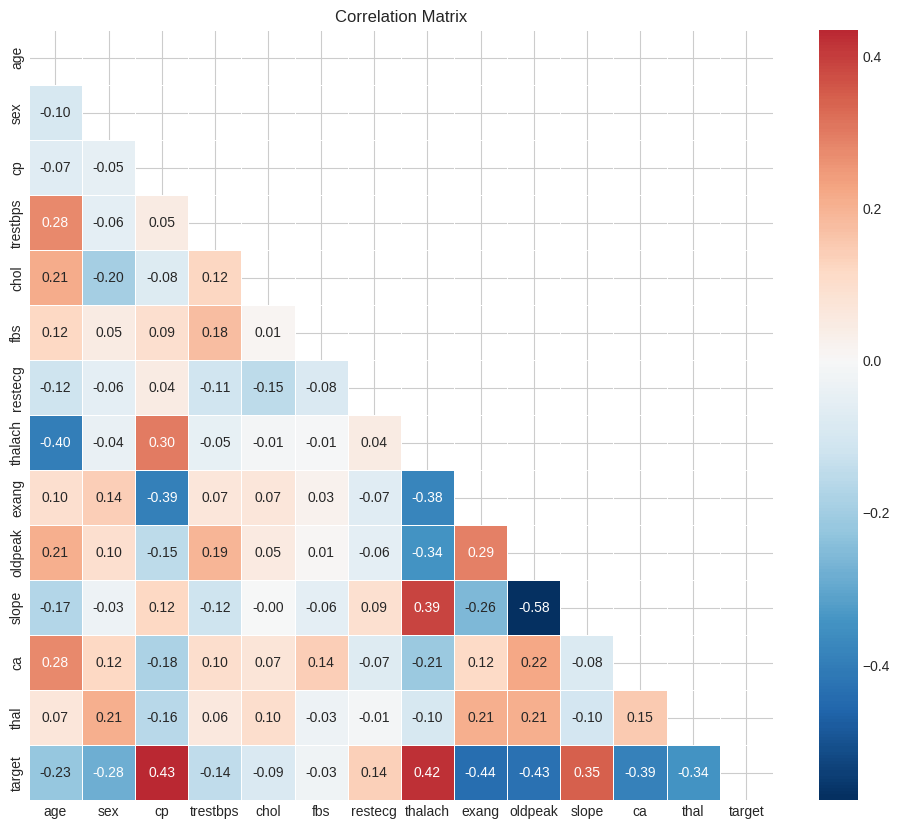

In [35]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=0, linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()

In [36]:
#Correlation with target
target_corr = corr_matrix['target'].drop("target").sort_values(key=abs, ascending=False)
print("Correlations with heart Disease:")
print("="*60)

for feat, corr in target_corr.items():
  direction = '↑' if corr > 0 else '↓'
  strength = 'strong' if abs(corr) > 0.3 else 'Moderate' if abs(corr) > 0.15 else 'Weak'
  print(f" {feat:<12} {corr:>6.3f} {direction} ({strength})")

Correlations with heart Disease:
 exang        -0.437 ↓ (strong)
 cp            0.434 ↑ (strong)
 oldpeak      -0.431 ↓ (strong)
 thalach       0.422 ↑ (strong)
 ca           -0.392 ↓ (strong)
 slope         0.346 ↑ (strong)
 thal         -0.344 ↓ (strong)
 sex          -0.281 ↓ (Moderate)
 age          -0.225 ↓ (Moderate)
 trestbps     -0.145 ↓ (Weak)
 restecg       0.137 ↑ (Weak)
 chol         -0.085 ↓ (Weak)
 fbs          -0.028 ↓ (Weak)


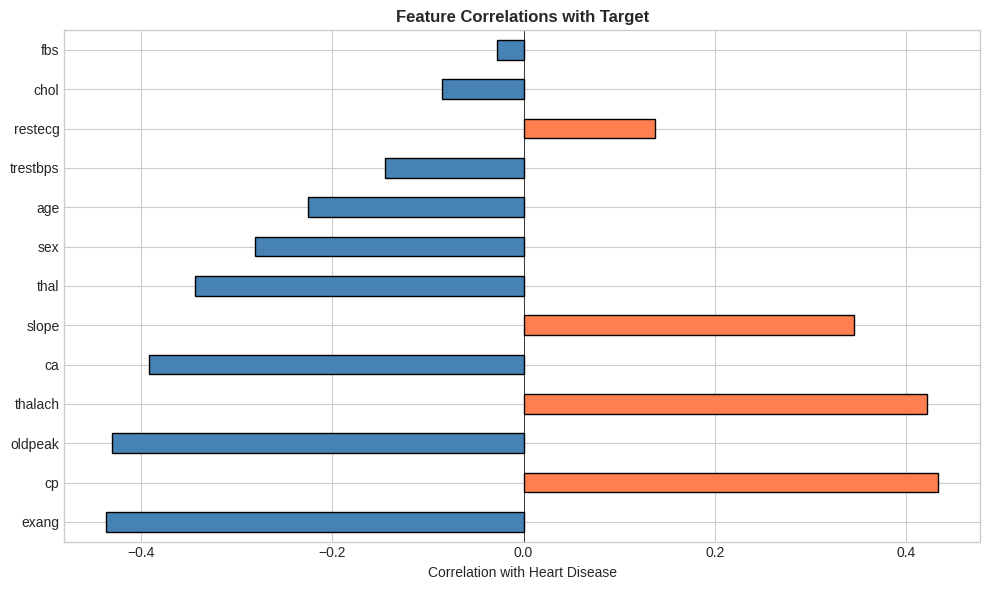


Interpretation:
  Positive = Higher values → More heart disease
  Negative = Higher values → Less heart disease


In [38]:
# Visualize top correlations with target
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['coral' if x > 0 else 'steelblue' for x in target_corr.values]
target_corr.plot(kind='barh', ax=ax, color=colors, edgecolor='black')

ax.set_xlabel('Correlation with Heart Disease')
ax.set_title('Feature Correlations with Target', fontsize=12, fontweight='bold')
ax.axvline(x=0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("  Positive = Higher values → More heart disease")
print("  Negative = Higher values → Less heart disease")

In [39]:
# Check for multicollinearity (features correlated with each other)
print("\nHighly Correlated Feature Pairs (|r| > 0.5):")
print("="*50)

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            feat1 = corr_matrix.columns[i]
            feat2 = corr_matrix.columns[j]
            corr = corr_matrix.iloc[i, j]
            print(f"  {feat1} ↔ {feat2}: {corr:.3f}")


Highly Correlated Feature Pairs (|r| > 0.5):
  oldpeak ↔ slope: -0.578


Outlier Analysis

In [40]:
def count_outliers_iqr(data, multiplier=1.5):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - multiplier * IQR
  upper = Q3 + multiplier * IQR
  outliers = ((data < lower) | (data > upper)).sum()
  return outliers, lower, upper

print("Outlier Analysis:")
print("="*50)
print(f"{'Feature':<12} {'Outliers':<10} {'%':<8} {'Lower':<10} {'Upper':<10}")

for col in numeric_cols:
  n_outliers, lower, upper = count_outliers_iqr(df[col])
  pct = n_outliers / len(df) * 100
  print(f"{col:<12} {n_outliers:<10} {pct:<8.1f} {lower:<10.1f} {upper:<10.1f}")



Outlier Analysis:
Feature      Outliers   %        Lower      Upper     
age          0          0.0      27.2       81.2      
trestbps     9          3.0      90.0       170.0     
chol         5          1.7      115.8      369.8     
thalach      1          0.3      84.8       214.8     
oldpeak      5          1.7      -2.4       4.0       


In [41]:
# Look at cholesterol outliers
print("\nHigh Cholesterol Outliers (>360):")
high_chol = df[df['chol'] > 360][['age', 'sex', 'chol', 'target']]
print(high_chol)

print(f"\nDisease rate in high cholesterol: {high_chol['target'].mean():.1%}")
print(f"Disease rate overall: {df['target'].mean():.1%}")


High Cholesterol Outliers (>360):
     age  sex  chol  target
28    65    0   417       1
85    67    0   564       1
96    62    0   394       1
220   63    0   407       0
246   56    0   409       0

Disease rate in high cholesterol: 60.0%
Disease rate overall: 54.5%


Summary Dashboard

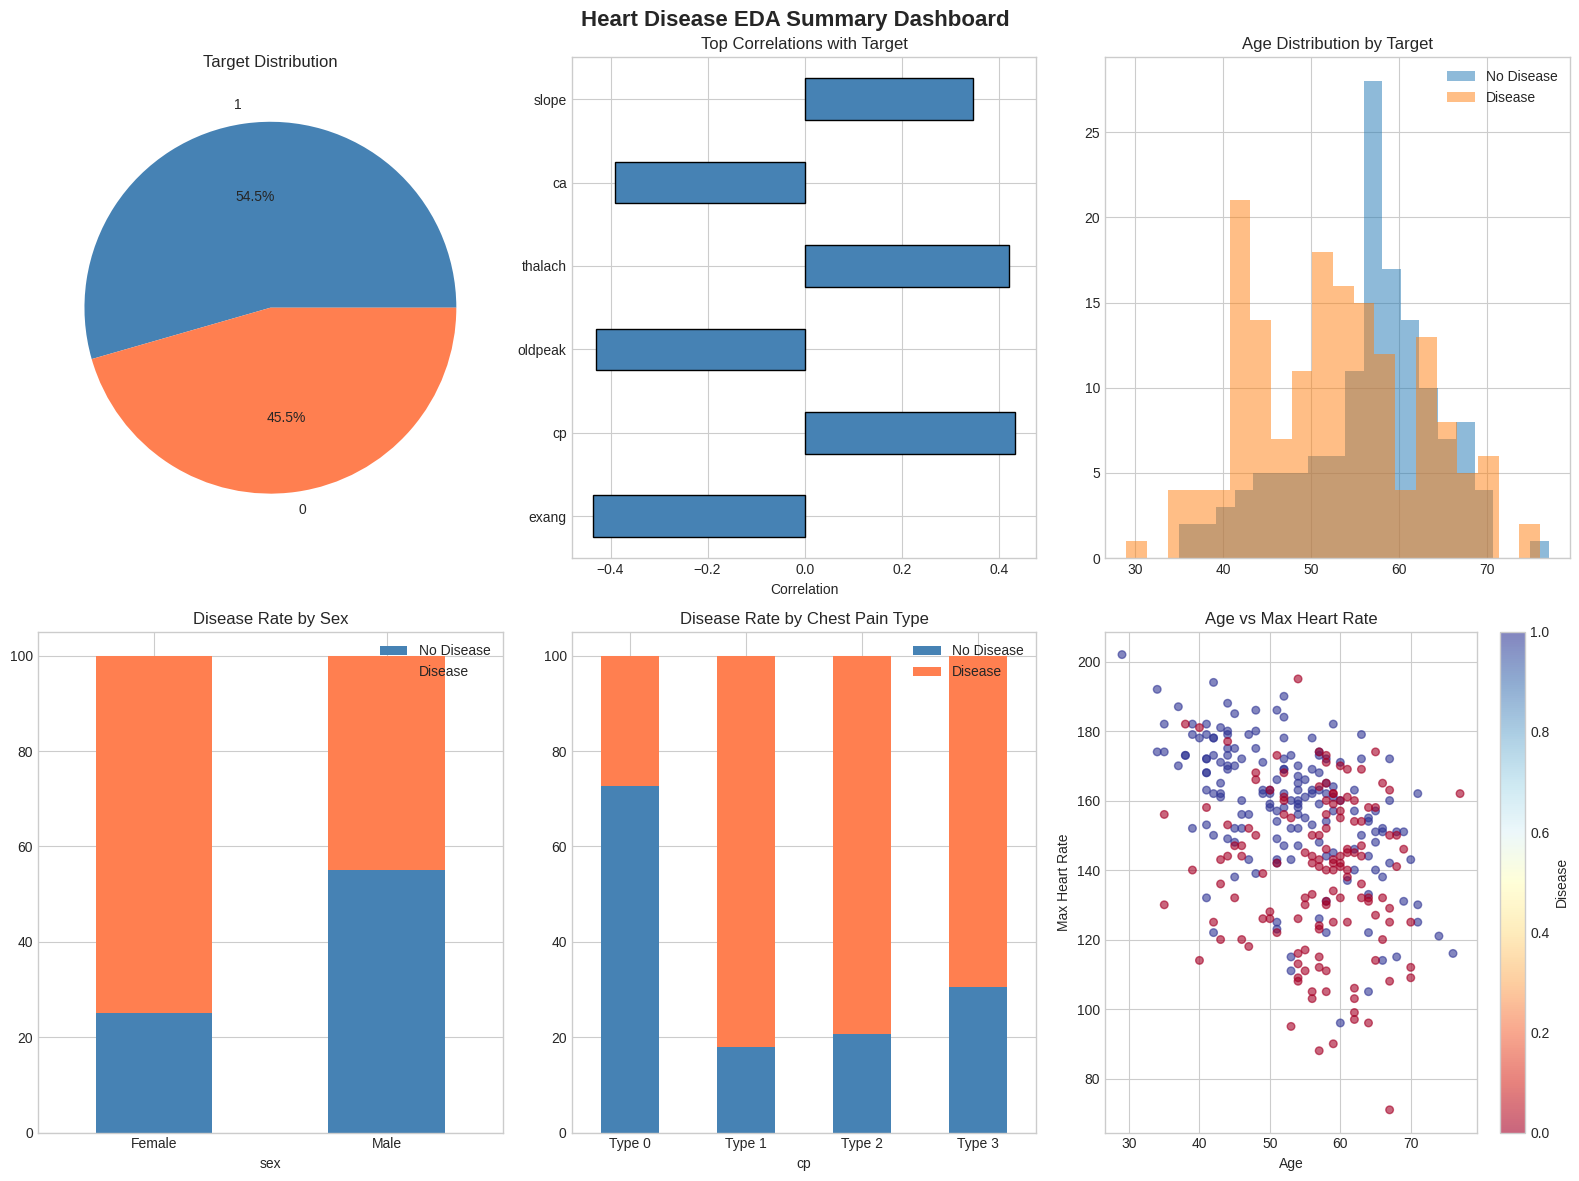

In [42]:
# Create a summary dashboard
fig = plt.figure(figsize=(16, 12))

# 1. Target distribution
ax1 = fig.add_subplot(2, 3, 1)
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                  colors=['steelblue', 'coral'], ax=ax1)
ax1.set_title('Target Distribution')
ax1.set_ylabel('')

# 2. Correlation with target
ax2 = fig.add_subplot(2, 3, 2)
target_corr.head(6).plot(kind='barh', ax=ax2, color='steelblue', edgecolor='black')
ax2.set_title('Top Correlations with Target')
ax2.set_xlabel('Correlation')

# 3. Age distribution by target
ax3 = fig.add_subplot(2, 3, 3)
df[df['target']==0]['age'].hist(alpha=0.5, label='No Disease', ax=ax3, bins=20)
df[df['target']==1]['age'].hist(alpha=0.5, label='Disease', ax=ax3, bins=20)
ax3.set_title('Age Distribution by Target')
ax3.legend()

# 4. Sex vs Disease
ax4 = fig.add_subplot(2, 3, 4)
ct = pd.crosstab(df['sex'], df['target'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, ax=ax4, color=['steelblue', 'coral'])
ax4.set_title('Disease Rate by Sex')
ax4.set_xticklabels(['Female', 'Male'], rotation=0)
ax4.legend(['No Disease', 'Disease'])

# 5. Chest Pain vs Disease
ax5 = fig.add_subplot(2, 3, 5)
ct = pd.crosstab(df['cp'], df['target'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, ax=ax5, color=['steelblue', 'coral'])
ax5.set_title('Disease Rate by Chest Pain Type')
ax5.set_xticklabels(['Type 0', 'Type 1', 'Type 2', 'Type 3'], rotation=0)
ax5.legend(['No Disease', 'Disease'])

# 6. Max Heart Rate vs Age (scatter)
ax6 = fig.add_subplot(2, 3, 6)
scatter = ax6.scatter(df['age'], df['thalach'], c=df['target'],
                      cmap='RdYlBu', alpha=0.6, s=30)
ax6.set_xlabel('Age')
ax6.set_ylabel('Max Heart Rate')
ax6.set_title('Age vs Max Heart Rate')
plt.colorbar(scatter, ax=ax6, label='Disease')

plt.suptitle('Heart Disease EDA Summary Dashboard', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

EDA Report Generator

In [46]:
def generate_eda_report(df, target_col):
  """
  Generating a quick EDA Report for any dataset.

  """
  print("="*70)
  print("EXPLORATORY DATA ANALYSIS REPORT")
  print("="*70)

  #Basic info
  print(f"\n1. Dataset Overview")
  print(f"     Rows: {df.shape[0]:,}")
  print(f"     Columns: {df.shape[1]:,}")
  print(f"     Target: {target_col}")

  #Missing values
  print(f"\n2. Missing Values")
  missing = df.isnull().sum()
  if missing.sum() == 0:
    print("     No missing values found!")
  else:
    print(f"     Missing values found - {missing.sum()}")
    for col in missing[missing > 0].index:
      print(f"     {col}: {missing[col]} ({missing[col]/len(df)*100:.1f}%)")

  #Target distribution
  print(f"\n3. Target Distribution")
  for val, count in df[target_col].value_counts().items():
    print(f"     {val}: {count} ({count/len(df)*100:.1f}%)")

  #Numeric Features
  numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
  if target_col in numeric_cols:
    numeric_cols.remove(target_col)

  print(f"\n4. Numeric Features")
  for col in numeric_cols[:5]:
    print(f"     {col}: mean={df[col].mean():.2f}, std={df[col].std():.2f}")
  if len(numeric_cols) > 5:
    print(f"     ... and {len(numeric_cols)-5} more")

  #Top correlations with target
  print(f"\n5. Top Correlations with Target")
  corr = df.corr()[target_col].drop(target_col).sort_values(key=abs, ascending=False)
  for feat, val in corr.head(5).items():
    print(f"     {feat}: {val:.2f}")

  #Recommendations
  print(f"\n6. RECOMMENDATIONS")
  if missing.sum() > 0:
    print("     - Handle missing values before modelling")
  if df[target_col].value_counts().min() / df[target_col].value_counts().max() < 0.3:
    print("     - Consider handling class imbalance")
  print("   - Consider feature engineering based on domain knowledge")
  print("   - Check for outliers in numeric features")

  print("\n" + "="*70)

# Run it
generate_eda_report(df, 'target')

EXPLORATORY DATA ANALYSIS REPORT

1. Dataset Overview
     Rows: 303
     Columns: 14
     Target: target

2. Missing Values
     No missing values found!

3. Target Distribution
     1: 165 (54.5%)
     0: 138 (45.5%)

4. Numeric Features
     age: mean=54.37, std=9.08
     sex: mean=0.68, std=0.47
     cp: mean=0.97, std=1.03
     trestbps: mean=131.62, std=17.54
     chol: mean=246.26, std=51.83
     ... and 8 more

5. Top Correlations with Target
     exang: -0.44
     cp: 0.43
     oldpeak: -0.43
     thalach: 0.42
     ca: -0.39

6. RECOMMENDATIONS
   - Consider feature engineering based on domain knowledge
   - Check for outliers in numeric features

